In [74]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [75]:
plt.rcParams["font.family"] = 'BM YEONSUNG'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (5, 3)
plt.rcParams["axes.unicode_minus"] = False

## 문제1
#### 데이터

In [76]:
D=pd.read_excel('https://data.hossam.kr/E02/material.xlsx')
data=pd.DataFrame(D)

In [77]:
data.dropna(inplace=True)

1. 각 표본의 분산부터 확인해보자

In [78]:
print(data["상표1"].std(),data["상표2"].std())

1.9494728632234029 1.6594845250525514


#### 2. 독립표본 T_test
$H_1$ : 두 표본의 평군값에 차이가 있다

In [79]:
sp.stats.ttest_ind(data["상표1"],data["상표2"],equal_var=False)

Ttest_indResult(statistic=1.3710671216714043, pvalue=0.1876309249524432)

결론 : 두 원료의 주성분 A의 함량이 다르다고 말하기 어렵다(유의수준 5%미만에서)

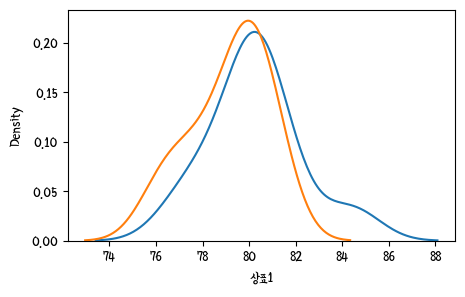

In [80]:
plt.figure()
sb.kdeplot(data=data["상표1"])
sb.kdeplot(data=data["상표2"])
plt.show()

## 문제2
#### 데이터

In [81]:
Data=pd.read_excel('https://data.hossam.kr/E02/blood_pressure.xlsx')
data=pd.DataFrame(Data)

In [82]:
data.head(2)

,복용전,복용후
0,70,68
1,80,72


In [103]:
test=data.T.reset_index().melt(id_vars="index")

#### 대응표본 T test
$H_1$ : 피임약은 혈압에 영향을 준다

In [83]:
sp.stats.ttest_rel(data["복용전"],data["복용후"])

TtestResult(statistic=3.105360487466109, pvalue=0.007749436106654119, df=14)

P-value 값이 0.05보다 작으므로 $H_1$ 채택

>그렇다면 어떤 식으로 영향을 줄까

$H_1$ : 피임약은 혈압을 높인다

In [84]:
sp.stats.ttest_rel(data["복용전"],data["복용후"],alternative="less")

TtestResult(statistic=3.105360487466109, pvalue=0.9961252819466729, df=14)

$H_1$ : 피임약은 혈압을 낮춘다

In [85]:
sp.stats.ttest_rel(data["복용전"],data["복용후"],alternative="greater")

TtestResult(statistic=3.105360487466109, pvalue=0.0038747180533270594, df=14)

결론 : 피임약은 신뢰도 95%에서 혈압을 낮춘다.

In [86]:
x,y=np.histogram(data["복용전"],bins=7)
z,w=np.histogram(data["복용후"],bins=7)

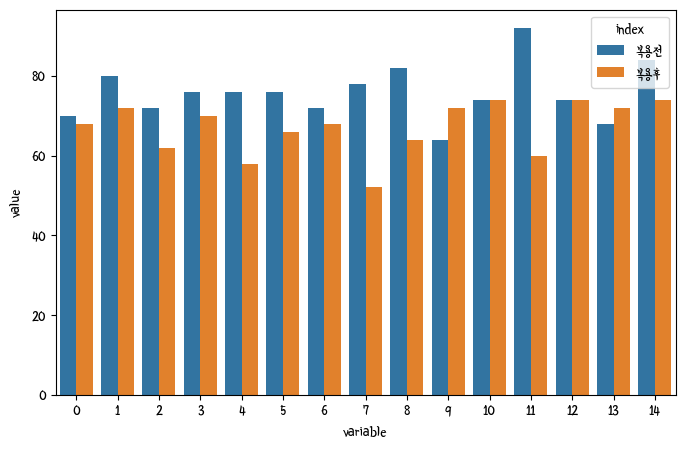

In [111]:
plt.rcParams["figure.figsize"]=(8,5)
plt.figure()
sb.barplot(data=test,
           x=test["variable"],
           y=test["value"],
           hue="index")
plt.show()

## 문제4
#### 데이터

In [114]:
Data=pd.read_excel('https://data.hossam.kr/E02/wrestler_diet.xlsx')
data=pd.DataFrame(Data)
datas=[]
for col in [list(data.columns[1:])[2*i:2*(i+1)] for i in range(3)]:
    datas.append(data[["이름"]+col])

In [170]:
[list(data.columns[1:])[2*i:2*(i+1)] for i in range(3)]

[['감량전 악력', '감량후 악력'], ['감량전 윗몸일으키기', '감량후 윗몸일으키기'], ['감량전 턱걸이', '감량후 턱걸이']]

In [129]:
subject=dict(zip(['악력',"윗몸일으키기","턱걸이"],datas))

In [167]:
H_1={
    "two-sided" : f'감량전 후 {sub}의 차이가 있다',
    "greater" : f'감량전 {sub}값이 감량후 {sub}값보다 크다',
    "less" : f'감량전 {sub}값이 감량후 {sub}값보다 작다'
}

In [169]:
for sub in subject:
    print("="*30)
    print(sub,"과목에 대한 분석입니다")
    print("="*30)
    H_1={
    "two-sided" : f'감량전 후 {sub}의 차이가 있다',
    "greater" : f'감량전 {sub}값이 감량후 {sub}값보다 크다',
    "less" : f'감량전 {sub}값이 감량후 {sub}값보다 작다'
    }
    for method in H_1:
        t,p=sp.stats.ttest_rel(subject[sub][subject[sub].columns[1]],subject[sub][subject[sub].columns[2]],alternative=method)
        if p<0.05:
            print(" p-value :",p,"\n","t-value :",t)
            print("\n")
            print(H_1[method])
            print("-"*30)

악력 과목에 대한 분석입니다
 p-value : 0.037454446305019644 
 t-value : 2.3654081485744824


감량전 후 악력의 차이가 있다
------------------------------
 p-value : 0.018727223152509822 
 t-value : 2.3654081485744824


감량전 악력값이 감량후 악력값보다 크다
------------------------------
윗몸일으키기 과목에 대한 분석입니다
 p-value : 1.798236117030195e-05 
 t-value : -7.179926973956724


감량전 후 윗몸일으키기의 차이가 있다
------------------------------
 p-value : 8.991180585150975e-06 
 t-value : -7.179926973956724


감량전 윗몸일으키기값이 감량후 윗몸일으키기값보다 작다
------------------------------
턱걸이 과목에 대한 분석입니다
 p-value : 2.7937021187235204e-05 
 t-value : -6.841977654731714


감량전 후 턱걸이의 차이가 있다
------------------------------
 p-value : 1.3968510593617602e-05 
 t-value : -6.841977654731714


감량전 턱걸이값이 감량후 턱걸이값보다 작다
------------------------------


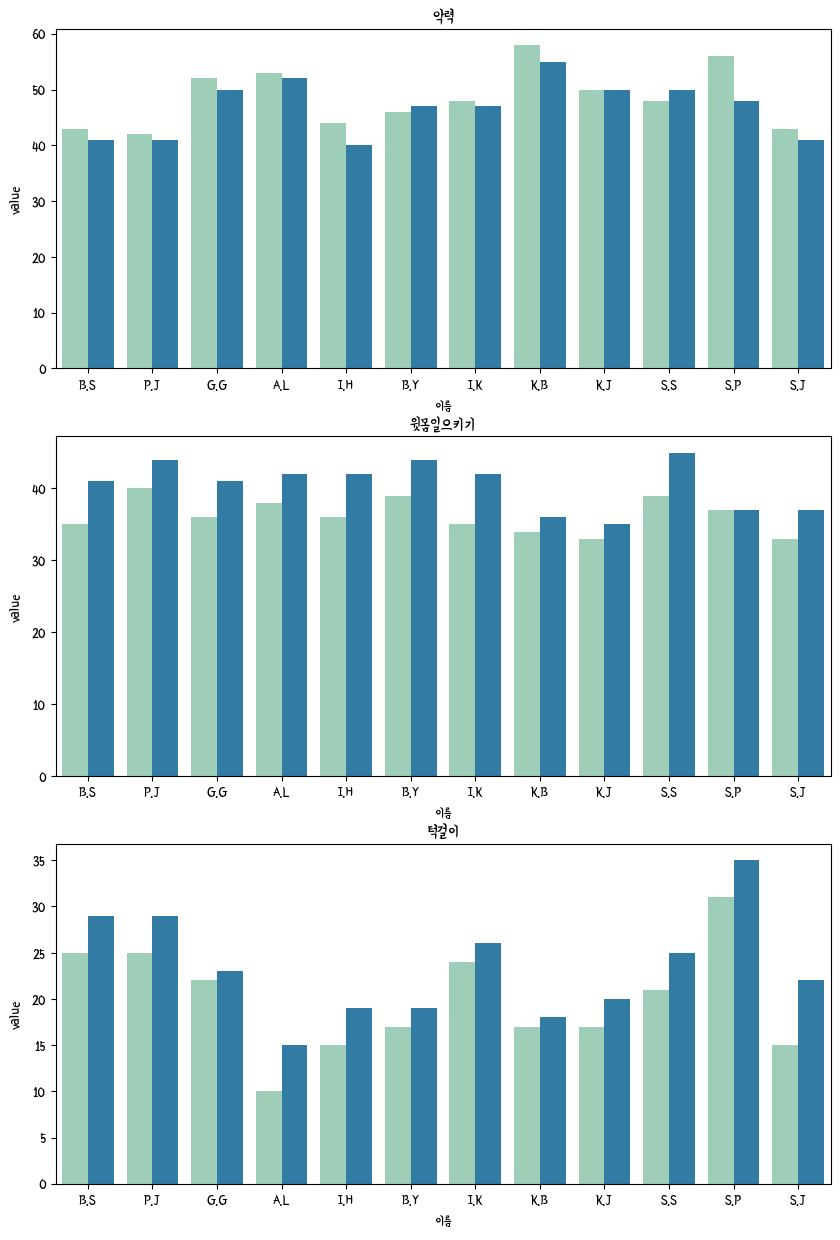

In [206]:
plt.rcParams["figure.figsize"]=(10,15)
f,a=plt.subplots(3,1)
ax=dict(zip(subject.keys(),a))
for sub in subject:
    sb.barplot(data=subject[sub].melt(id_vars="이름"),
           x="이름",y="value",hue="variable",ax=ax[sub],palette='YlGnBu')
    ax[sub].legend().remove()
    ax[sub].set_title(sub)

<Axes: >